In [ ]:
!pip install transformers datasets sacrebleu evaluate codecarbon tensorboard


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.7/516.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 109.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
output_dir = '/content/drive/My Drive/YorubaSTEM/output/2'

Mounted at /content/drive


In [ ]:
#Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

import json
import os
import torch
from transformers import (
    MT5ForConditionalGeneration,
    MT5Tokenizer,
    Seq2SeqTrainingArguments,
    Seq2SeqTrainer,
    DataCollatorForSeq2Seq,
)
from datasets import Dataset
import evaluate
from codecarbon import EmissionsTracker
from huggingface_hub import HfFolder


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Set seed for reproducibility
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed) if torch.cuda.is_available() else None
np.random.seed(seed)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Start tracking emissions
tracker = EmissionsTracker(project_name="YorubaSTEMT5", output_dir=output_dir)
tracker.start()

Using device: cuda


[codecarbon INFO @ 23:32:49] [setup] RAM Tracking...
[codecarbon INFO @ 23:32:49] [setup] CPU Tracking...
[codecarbon WARNING @ 23:32:49] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU

[codecarbon WARNING @ 23:32:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 23:32:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 23:32:50] [setup] GPU Tracking...
[codecarbon INFO @ 23:32:50] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 23:32:50] >>> Tracker's metadata:
[codecarbon INFO @ 23:32:50]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 23:32:50]   Python version: 3.11.11
[codecarbon INFO @ 23:32:50]   CodeCarbon version: 2.8.3
[codecarbon INFO @ 23:32:50]   Available RAM : 83.477 GB
[codecarbon INFO @ 23:32:50]   CPU count: 12
[codec

In [ ]:
!git clone https://github.com/gbelewade/YorubaSTEM.git

Cloning into 'YorubaSTEM'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 160 (delta 56), reused 150 (delta 49), pack-reused 0 (from 0)
Receiving objects: 100% (160/160), 10.00 MiB | 19.40 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [ ]:
# Load model and tokenizer
model_name = "Davlan/mt5_base_eng_yor_mt"
print(f"Loading tokenizer and model from {model_name}...")
tokenizer = MT5Tokenizer.from_pretrained(model_name)
model = MT5ForConditionalGeneration.from_pretrained(model_name)

print(f"Tokenizer vocabulary size: {tokenizer.vocab_size}")
print(f"Model embedding size: {model.shared.num_embeddings}")

# Set prefix for MT5 translation task
source_prefix = "translate English to Yoruba: "

# Load data
def load_json_file(file_path):
    """Load JSON file and return a list of dictionaries."""
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line:  # Skip empty lines
                json_obj = json.loads(line)
                data.append(json_obj)
    return data

# Load the data from the JSON files
train_data = load_json_file("YorubaSTEM/Preprocess/splits/train.json")
dev_data = load_json_file("YorubaSTEM/Preprocess/splits/dev.json")
test_data = load_json_file("YorubaSTEM/Preprocess/splits/test.json")

print(f"Number of training examples: {len(train_data)}")
print(f"Number of validation examples: {len(dev_data)}")
print(f"Number of test examples: {len(test_data)}")

Loading tokenizer and model from Davlan/mt5_base_eng_yor_mt...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/351 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/673 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'T5Tokenizer'. 
The class this function is called from is 'MT5Tokenizer'.
You are using the default legacy behaviour of the <class 'transformers.models.mt5.tokenization_mt5.MT5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

[codecarbon INFO @ 23:33:05] Energy consumed for RAM : 0.000130 kWh. RAM Power : 31.30389261245728 W
[codecarbon INFO @ 23:33:05] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 23:33:05] Energy consumed for all GPUs : 0.000192 kWh. Total GPU Power : 46.0455668625551 W
[codecarbon INFO @ 23:33:05] 0.000500 kWh of electricity used since the beginning.


model.safetensors:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

Tokenizer vocabulary size: 250100
Model embedding size: 250112
Number of training examples: 3722
Number of validation examples: 465
Number of test examples: 466


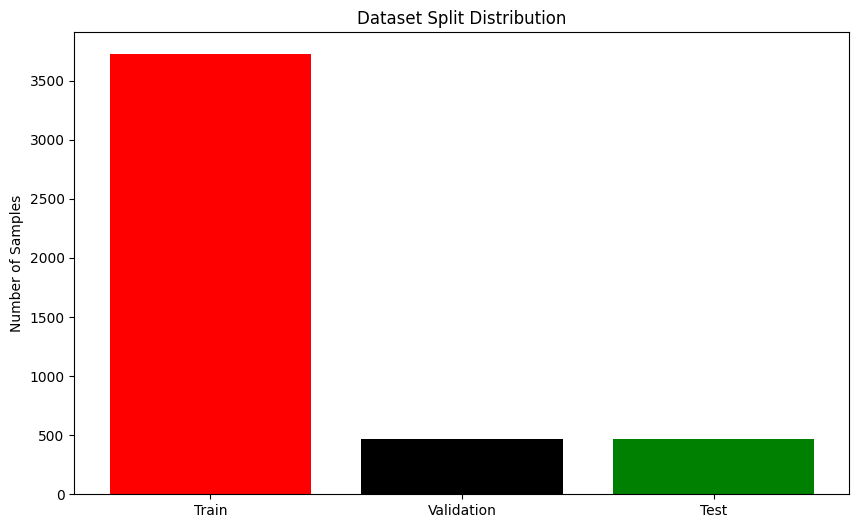

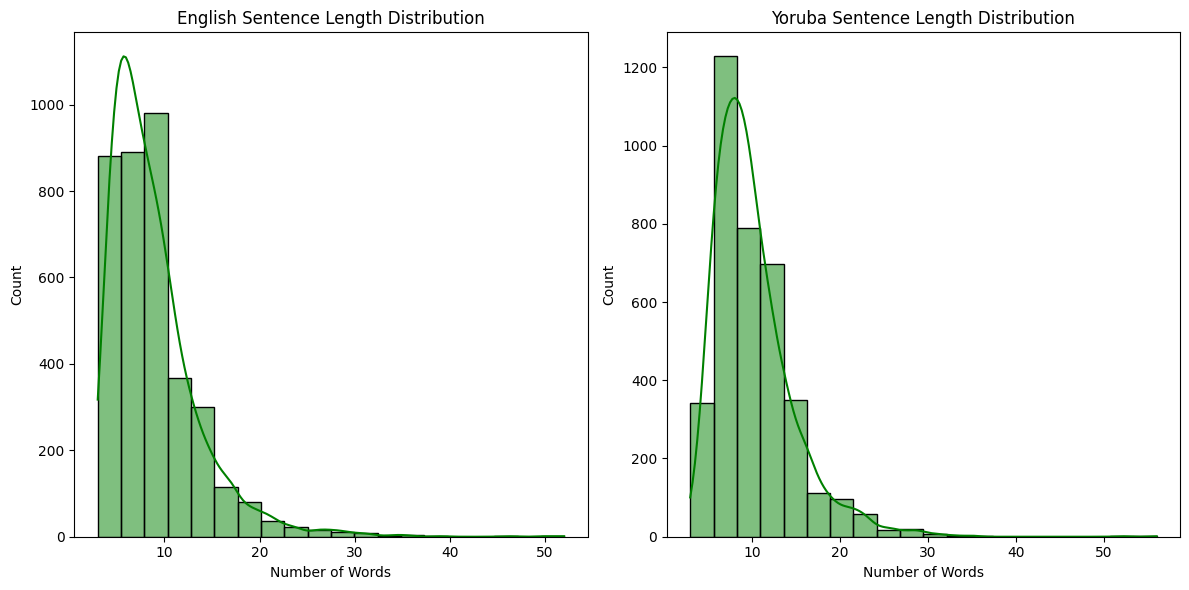

In [ ]:
# Visualize dataset distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Use the correct data variables: train_data, dev_data, test_data
sample_counts = [len(train_data), len(dev_data), len(test_data)]
plt.bar(['Train', 'Validation', 'Test'], sample_counts, color=['red', 'black', 'green'])
plt.title('Dataset Split Distribution')
plt.ylabel('Number of Samples')
plt.savefig('dataset_distribution.png')
plt.show()

# Analyze sentence lengths
# Assuming 'source' and 'target' are keys in your data dictionaries:
import seaborn as sns # Import seaborn for histplot

train_source_lengths = [len(item["translation"]["source"].split()) for item in train_data]
train_target_lengths = [len(item["translation"]["target"].split()) for item in train_data]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_source_lengths, bins=20, kde=True, color='green')
plt.title('English Sentence Length Distribution')
plt.xlabel('Number of Words')

plt.subplot(1, 2, 2)
sns.histplot(train_target_lengths, bins=20, kde=True, color='green')
plt.title('Yoruba Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.tight_layout()
plt.savefig('sentence_length_distribution.png')
plt.show()

In [ ]:
# Extract the source and target sentences
def extract_translations(data):
    """Extract the source and target sentences from the data."""
    sources = []
    targets = []
    for item in data:
        sources.append(item["translation"]["source"])
        targets.append(item["translation"]["target"])
    return sources, targets

train_sources, train_targets = extract_translations(train_data)
dev_sources, dev_targets = extract_translations(dev_data)
test_sources, test_targets = extract_translations(test_data)

# Convert to datasets format
train_dataset = Dataset.from_dict({
    "source": train_sources,
    "target": train_targets
})

dev_dataset = Dataset.from_dict({
    "source": dev_sources,
    "target": dev_targets
})

test_dataset = Dataset.from_dict({
    "source": test_sources,
    "target": test_targets
})

# Set max sequence lengths
max_source_length = 128
max_target_length = 128

# Custom data collator that clips token IDs
class SafeDataCollator(DataCollatorForSeq2Seq):
    def __call__(self, features, return_tensors=None):
        batch = super().__call__(features, return_tensors)

        vocab_size = tokenizer.vocab_size

        # Ensure all input_ids are in vocab range
        if "input_ids" in batch:
            batch["input_ids"] = torch.clamp(batch["input_ids"], min=0, max=vocab_size - 1)

        # Ensure all labels are either -100 or in vocab range
        if "labels" in batch:
            # Create mask for valid labels (not -100)
            valid_labels_mask = batch["labels"] != -100
            # Apply clipping only to valid labels
            batch["labels"] = torch.where(
                valid_labels_mask,
                torch.clamp(batch["labels"], min=0, max=vocab_size - 1),
                batch["labels"]  # Keep -100 as is
            )

        return batch



In [ ]:
# Tokenize function with input_id clamping
def preprocess_function(examples):
    """Tokenize with input_id clamping to ensure values are in range."""
    # Add prefix to source
    inputs = [source_prefix + src for src in examples["source"]]
    targets = examples["target"]

    # Tokenize source
    model_inputs = tokenizer(
        inputs,
        max_length=max_source_length,
        padding="max_length",
        truncation=True
    )

    # Tokenize targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            targets,
            max_length=max_target_length,
            padding="max_length",
            truncation=True
        )

    # Handle padding tokens
    model_inputs["labels"] = [
        [(l if l != tokenizer.pad_token_id else -100) for l in label]
        for label in labels["input_ids"]
    ]

    return model_inputs

# Process datasets
print("Tokenizing datasets...")
train_tokenized = train_dataset.map(
    preprocess_function,
    batched=True,
    batch_size=8,
    remove_columns=["source", "target"],
)

dev_tokenized = dev_dataset.map(
    preprocess_function,
    batched=True,
    batch_size=8,
    remove_columns=["source", "target"],
)

test_tokenized = test_dataset.map(
    preprocess_function,
    batched=True,
    batch_size=8,
    remove_columns=["source", "target"],
)

# Prepare data collator
data_collator = SafeDataCollator(
    tokenizer,
    model=model,
    padding="max_length",
    max_length=max_target_length
)




Tokenizing datasets...


Map:   0%|          | 0/3722 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3980: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/465 [00:00<?, ? examples/s]

Map:   0%|          | 0/466 [00:00<?, ? examples/s]

In [ ]:
# Load BLEU metric
metric = evaluate.load("sacrebleu")

# Compute metrics with error handling
def compute_metrics(eval_preds):
    try:
        preds, labels = eval_preds

        # Replace -100 with pad token id
        labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

        # Clip predictions to vocab size
        preds = np.clip(preds, 0, tokenizer.vocab_size - 1)

        # Decode predictions and labels
        decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

        # Format for BLEU
        decoded_preds = [pred.strip() for pred in decoded_preds]
        decoded_labels = [[label.strip()] for label in decoded_labels]

        # Calculate BLEU
        result = metric.compute(predictions=decoded_preds, references=decoded_labels)

        # Add mean generated length
        prediction_lens = [len(pred.split()) for pred in decoded_preds]
        result["gen_len"] = np.mean(prediction_lens)

        return {
            "bleu": result["score"],
            "gen_len": result["gen_len"]
        }

    except Exception as e:
        print(f"Error in compute_metrics: {e}")
        return {"bleu": 0.0, "gen_len": 0.0}


In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir=output_dir,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=15,
    predict_with_generate=True,
    generation_max_length=max_target_length,
    logging_steps=10,  # Log more frequently
    logging_dir=output_dir,
    logging_strategy="steps",  # Log at each step
    push_to_hub=False,
    report_to="tensorboard",
    load_best_model_at_end=True,
    metric_for_best_model="eval_bleu",
    greater_is_better=True,
    fp16=False,
    gradient_accumulation_steps=4,
    warmup_ratio=0.1,
    remove_unused_columns=False,
)

# Initialize trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=dev_tokenized,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Train the model
print("Starting training...")
train_result = trainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-11-928ef515ed1c>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Starting training...


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss,Bleu,Gen Len
0,1.750500,1.551425,10.984232,12.111828
1,1.493400,1.222747,20.044095,10.462366
2,1.312200,1.069381,24.849047,10.116129
3,1.107500,0.985378,27.439387,10.165591
4,1.089900,0.928299,29.181268,10.075269
5,0.955600,0.894396,31.681586,10.047312
6,0.987400,0.866051,33.164389,10.000000
7,0.893800,0.841945,33.419932,10.163441
8,0.851000,0.833791,34.401784,10.077419
9,0.788100,0.820605,35.539814,10.055914


[codecarbon INFO @ 23:33:20] Energy consumed for RAM : 0.000261 kWh. RAM Power : 31.30389261245728 W
[codecarbon INFO @ 23:33:20] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 23:33:20] Energy consumed for all GPUs : 0.000416 kWh. Total GPU Power : 53.693743241475815 W
[codecarbon INFO @ 23:33:20] 0.001031 kWh of electricity used since the beginning.
[codecarbon INFO @ 23:33:35] Energy consumed for RAM : 0.000391 kWh. RAM Power : 31.30389261245728 W
[codecarbon INFO @ 23:33:35] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 23:33:35] Energy consumed for all GPUs : 0.001263 kWh. Total GPU Power : 203.33138601474025 W
[codecarbon INFO @ 23:33:35] 0.002185 kWh of electricity used since the beginning.
[codecarbon INFO @ 23:33:50] Energy consumed for RAM : 0.000522 kWh. RAM Power : 31.30389261245728 W
[codecarbon INFO @ 23:33:50] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecar

In [ ]:
# Save trained model
trainer.save_model(output_dir)
tokenizer.save_pretrained(output_dir)

In [ ]:
# Evaluate on test set
print("Evaluating on test set...")
test_results = trainer.evaluate(test_tokenized, metric_key_prefix="test")
print(f"Test results: {test_results}")

Evaluating on test set...


[codecarbon INFO @ 00:57:56] Energy consumed for RAM : 0.044315 kWh. RAM Power : 31.30389261245728 W
[codecarbon INFO @ 00:57:56] Energy consumed for all CPUs : 0.060248 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 00:57:56] Energy consumed for all GPUs : 0.176900 kWh. Total GPU Power : 56.46791768320267 W
[codecarbon INFO @ 00:57:56] 0.281463 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:58:11] Energy consumed for RAM : 0.044445 kWh. RAM Power : 31.30389261245728 W
[codecarbon INFO @ 00:58:11] Energy consumed for all CPUs : 0.060425 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 00:58:11] Energy consumed for all GPUs : 0.177188 kWh. Total GPU Power : 69.2194815827895 W
[codecarbon INFO @ 00:58:11] 0.282059 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:58:26] Energy consumed for RAM : 0.044576 kWh. RAM Power : 31.30389261245728 W
[codecarbon INFO @ 00:58:26] Energy consumed for all CPUs : 0.060602 kWh. Total CPU Power : 42.5 W
[codecarbon

Test results: {'test_loss': 0.826926589012146, 'test_bleu': 36.07718495449654, 'test_gen_len': 10.19098712446352, 'test_runtime': 150.0811, 'test_samples_per_second': 3.105, 'test_steps_per_second': 0.78, 'epoch': 14.996777658431794}


In [ ]:
# Stop emissions tracking
emissions = tracker.stop()
print(f"Emissions: {emissions} kg CO2eq")

[codecarbon INFO @ 01:00:22] Energy consumed for RAM : 0.045587 kWh. RAM Power : 31.30389261245728 W
[codecarbon INFO @ 01:00:22] Energy consumed for all CPUs : 0.061976 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 01:00:22] Energy consumed for all GPUs : 0.179703 kWh. Total GPU Power : 66.61735109279553 W
[codecarbon INFO @ 01:00:22] 0.287266 kWh of electricity used since the beginning.
[codecarbon INFO @ 01:00:22] 0.018669 g.CO2eq/s mean an estimation of 588.734470609089 kg.CO2eq/year


Emissions: 0.1352400333816145 kg CO2eq


/usr/local/lib/python3.11/dist-packages/codecarbon/output_methods/file.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame.from_records([dict(total.values)])])


<ipython-input-15-06426aa082f9>:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot([x[0] for x in train_losses], [x[1] for x in train_losses], 'b-', label='Training Loss', color='red')
<ipython-input-15-06426aa082f9>:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([x[0] for x in eval_losses], [x[1] for x in eval_losses], 'r-', label='Validation Loss', color='black')


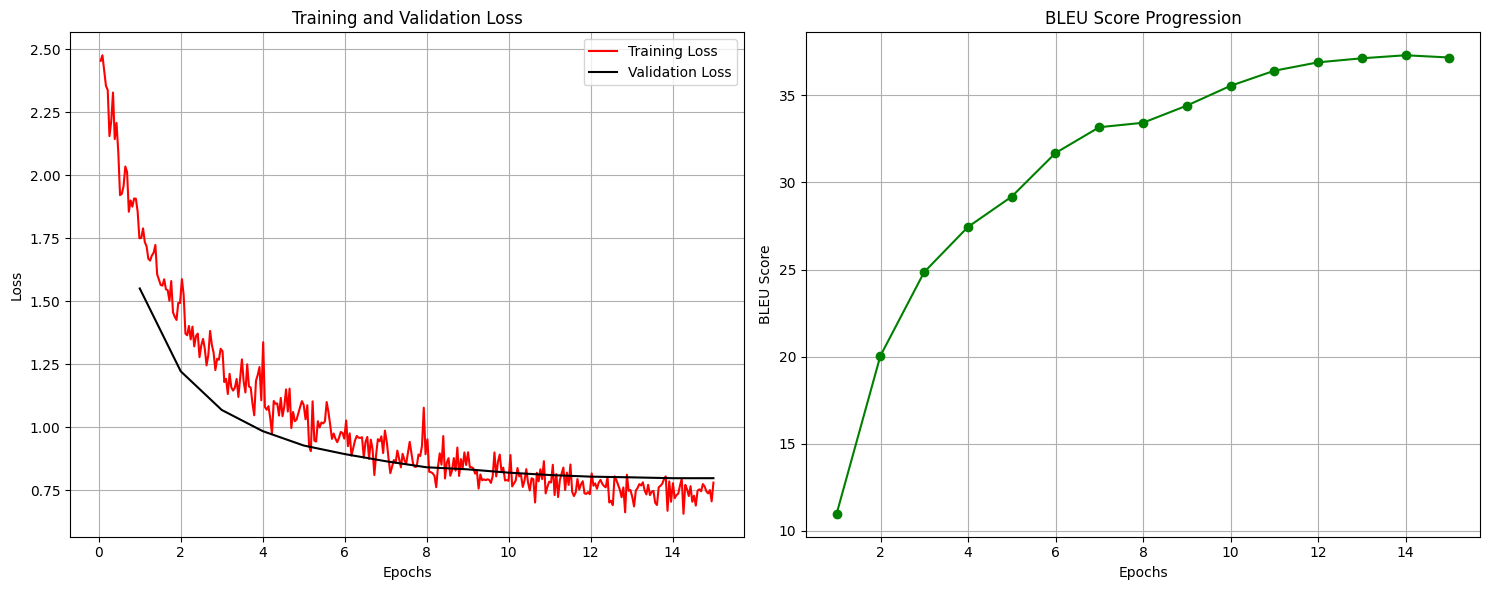

Training Loss values: [(0.04296455424274973, 2.4545), (0.08592910848549946, 2.4765), (0.1288936627282492, 2.4145), (0.17185821697099893, 2.3554), (0.21482277121374865, 2.3386), (0.2577873254564984, 2.1558), (0.3007518796992481, 2.2144), (0.34371643394199786, 2.3286), (0.3866809881847476, 2.1439), (0.4296455424274973, 2.208), (0.47261009667024706, 2.0933), (0.5155746509129968, 1.9217), (0.5585392051557465, 1.9265), (0.6015037593984962, 1.9571), (0.644468313641246, 2.0351), (0.6874328678839957, 2.0136), (0.7303974221267454, 1.8557), (0.7733619763694952, 1.9006), (0.8163265306122449, 1.8761), (0.8592910848549946, 1.9084), (0.9022556390977443, 1.9074), (0.9452201933404941, 1.8567), (0.9881847475832438, 1.7505), (1.0343716433941998, 1.7516), (1.0773361976369495, 1.7897), (1.1203007518796992, 1.7354), (1.163265306122449, 1.7184), (1.2062298603651986, 1.6693), (1.2491944146079486, 1.6619), (1.2921589688506983, 1.6819), (1.335123523093448, 1.693), (1.3780880773361976, 1.7239), (1.4210526315789

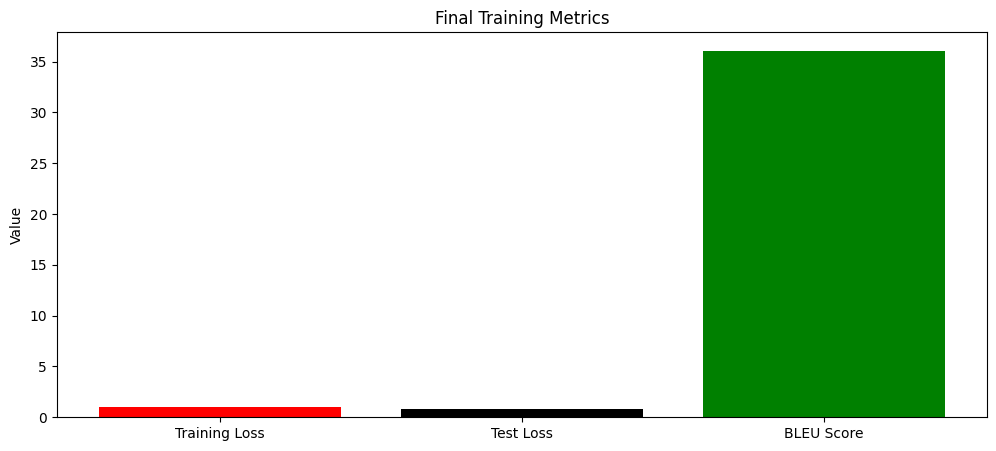

In [ ]:
# Extract metrics from the trainer's state log history
train_losses = []
eval_losses = []
eval_bleus = []
epochs = []

for entry in trainer.state.log_history:
    if "loss" in entry and "epoch" in entry and "eval_loss" not in entry:
        train_losses.append((entry["epoch"], entry["loss"]))
    if "eval_loss" in entry and "epoch" in entry:
        eval_losses.append((entry["epoch"], entry["eval_loss"]))
    if "eval_bleu" in entry and "epoch" in entry:
        eval_bleus.append((entry["epoch"], entry["eval_bleu"]))

# Sort by epoch
train_losses.sort(key=lambda x: x[0])
eval_losses.sort(key=lambda x: x[0])
eval_bleus.sort(key=lambda x: x[0])

# Plot the metrics
plt.figure(figsize=(15, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
if train_losses:
    plt.plot([x[0] for x in train_losses], [x[1] for x in train_losses], 'b-', label='Training Loss', color='red')
if eval_losses:
    plt.plot([x[0] for x in eval_losses], [x[1] for x in eval_losses], 'r-', label='Validation Loss', color='black')

if train_losses or eval_losses:
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
else:
    print("No loss data available in log history")

# Plot BLEU scores
if eval_bleus:
    plt.subplot(1, 2, 2)
    plt.plot([x[0] for x in eval_bleus], [x[1] for x in eval_bleus], 'g-o')
    plt.title('BLEU Score Progression')
    plt.xlabel('Epochs')
    plt.ylabel('BLEU Score')
    plt.grid(True)
else:
    print("No BLEU score data available in log history")

plt.tight_layout()
plt.savefig('training_metrics.png')
plt.show()

# Print the actual values for reference
print(f"Training Loss values: {train_losses}")
print(f"Validation Loss values: {eval_losses}")
print(f"BLEU Score values: {eval_bleus}")

# If you don't have enough data in the trainer state, you can create a summary plot
# with just the final metrics
plt.figure(figsize=(12, 5))
metrics_to_plot = []
values_to_plot = []

# Add training loss if available
if hasattr(train_result, 'training_loss'):
    metrics_to_plot.append('Training Loss')
    values_to_plot.append(train_result.training_loss)

# Add validation loss if available
if 'eval_loss' in test_results:
    metrics_to_plot.append('Validation Loss')
    values_to_plot.append(test_results['eval_loss'])

# Add test loss
if 'test_loss' in test_results:
    metrics_to_plot.append('Test Loss')
    values_to_plot.append(test_results['test_loss'])

# Add BLEU score
if 'test_bleu' in test_results:
    metrics_to_plot.append('BLEU Score')
    values_to_plot.append(test_results['test_bleu'])

plt.bar(metrics_to_plot, values_to_plot, color=['red', 'black', 'green', 'orange'][:len(metrics_to_plot)])
plt.title('Final Training Metrics')
plt.ylabel('Value')
plt.savefig('final_metrics.png')
plt.show()

Creating visualizations from training results...
Training metrics: {'train_runtime': 5061.6503, 'train_samples_per_second': 11.03, 'train_steps_per_second': 0.688, 'total_flos': 1.6724295445118976e+16, 'train_loss': 1.0392586643668427, 'epoch': 14.996777658431794}
Test metrics: {'test_loss': 0.826926589012146, 'test_bleu': 36.07718495449654, 'test_gen_len': 10.19098712446352, 'test_runtime': 150.0811, 'test_samples_per_second': 3.105, 'test_steps_per_second': 0.78, 'epoch': 14.996777658431794}


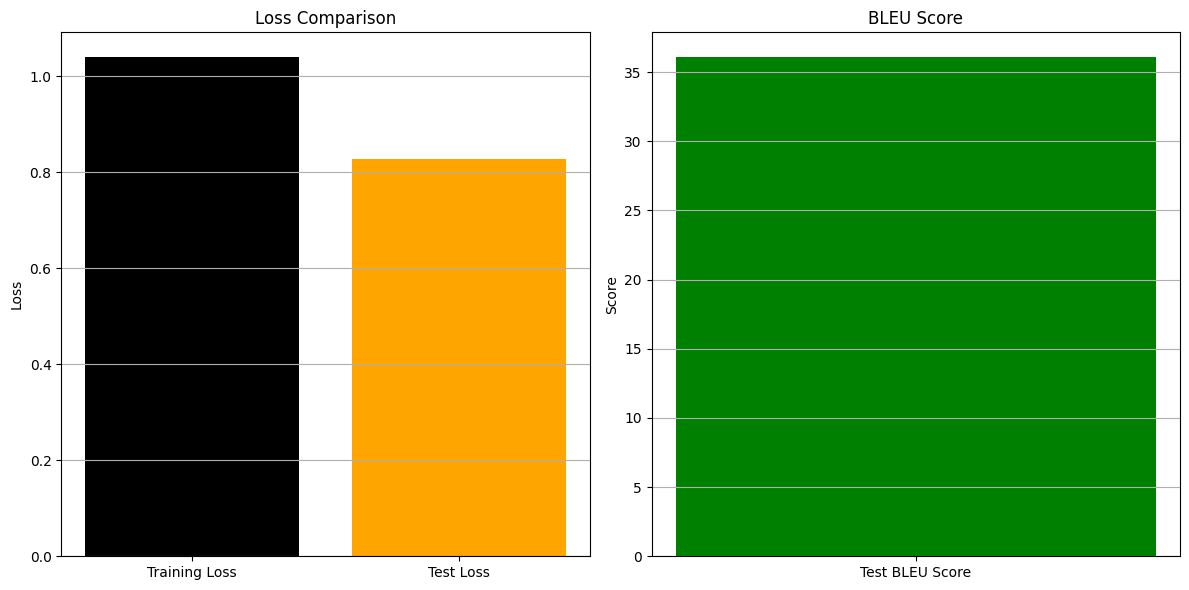

Training summary visualization saved to training_summary.png


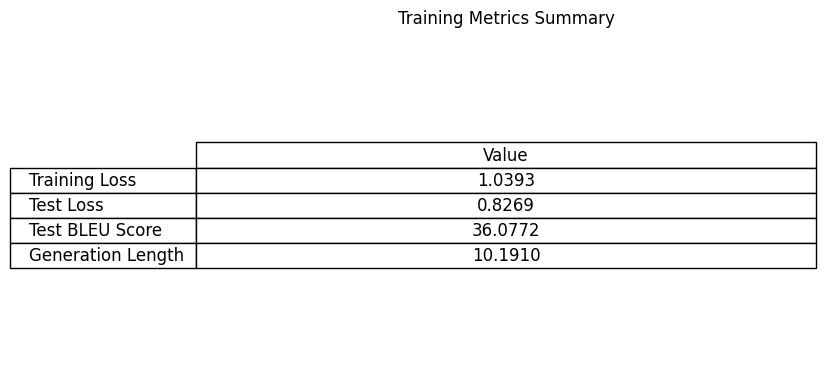

Metrics table visualization saved to metrics_table.png


In [ ]:
# Create visualizations from training results
print("Creating visualizations from training results...")

# Plot metrics from the training results
metrics = train_result.metrics
print(f"Training metrics: {metrics}")

# Plot evaluation metrics
eval_metrics = test_results
print(f"Test metrics: {eval_metrics}")

# Create summary bar chart for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(['Training Loss', 'Test Loss'],
        [metrics.get('train_loss', 0),
         eval_metrics.get('test_loss', 0)],
        color=['black', 'orange'])
plt.title('Loss Comparison')
plt.ylabel('Loss')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
plt.bar(['Test BLEU Score'],
        [eval_metrics.get('test_bleu', 0)],
        color='green')
plt.title('BLEU Score')
plt.ylabel('Score')
plt.grid(axis='y')

plt.tight_layout()
plt.savefig('training_summary.png')
plt.show()
print("Training summary visualization saved to training_summary.png")

# Create a metrics table
metrics_data = {
    'Metric': ['Training Loss', 'Test Loss', 'Test BLEU Score', 'Generation Length'],
    'Value': [
        f"{metrics.get('train_loss', 0):.4f}",
        f"{eval_metrics.get('test_loss', 0):.4f}",
        f"{eval_metrics.get('test_bleu', 0):.4f}",
        f"{eval_metrics.get('test_gen_len', 0):.4f}"
    ]
}

plt.figure(figsize=(8, 4))
plt.axis('off')
table = plt.table(
    cellText=[[metrics_data['Value'][i]] for i in range(len(metrics_data['Value']))],
    rowLabels=metrics_data['Metric'],
    colLabels=['Value'],
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
plt.title("Training Metrics Summary", pad=20)
plt.savefig('metrics_table.png')
plt.show()
print("Metrics table visualization saved to metrics_table.png")

Loading and preparing datasets...


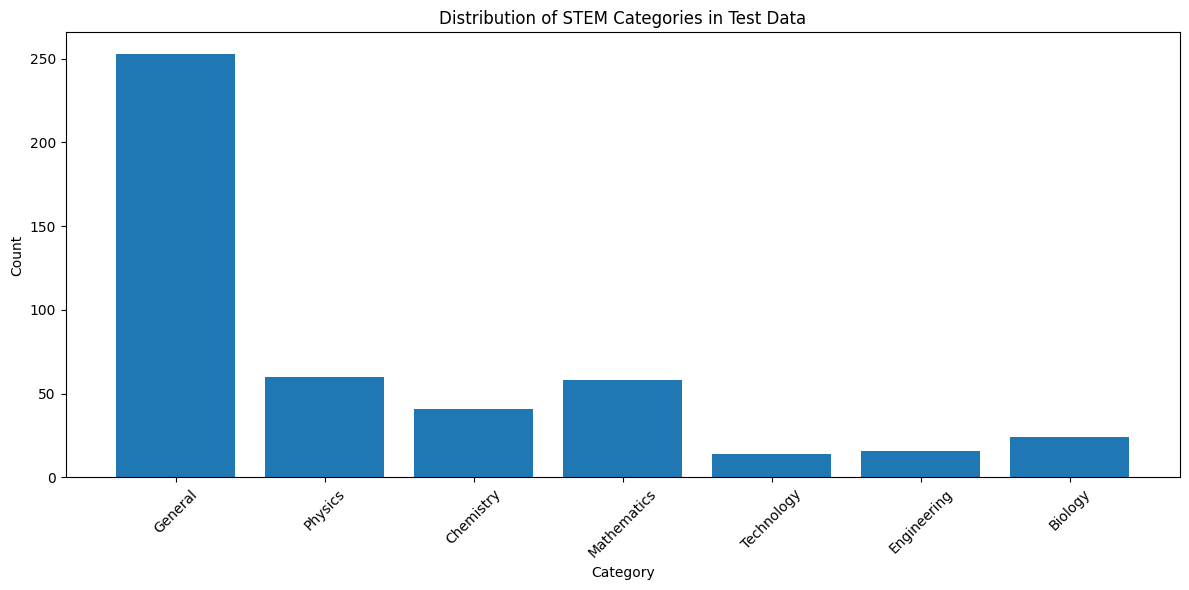

Generating translations for test data...
Processed 5/466 test samples
Processed 10/466 test samples
Processed 15/466 test samples
Processed 20/466 test samples
Processed 25/466 test samples
Processed 30/466 test samples
Processed 35/466 test samples
Processed 40/466 test samples
Processed 45/466 test samples
Processed 50/466 test samples
Processed 55/466 test samples
Processed 60/466 test samples
Processed 65/466 test samples
Processed 70/466 test samples
Processed 75/466 test samples
Processed 80/466 test samples
Processed 85/466 test samples
Processed 90/466 test samples
Processed 95/466 test samples
Processed 100/466 test samples
Processed 105/466 test samples
Processed 110/466 test samples
Processed 115/466 test samples
Processed 120/466 test samples
Processed 125/466 test samples
Processed 130/466 test samples
Processed 135/466 test samples
Processed 140/466 test samples
Processed 145/466 test samples
Processed 150/466 test samples
Processed 155/466 test samples
Processed 160/466 

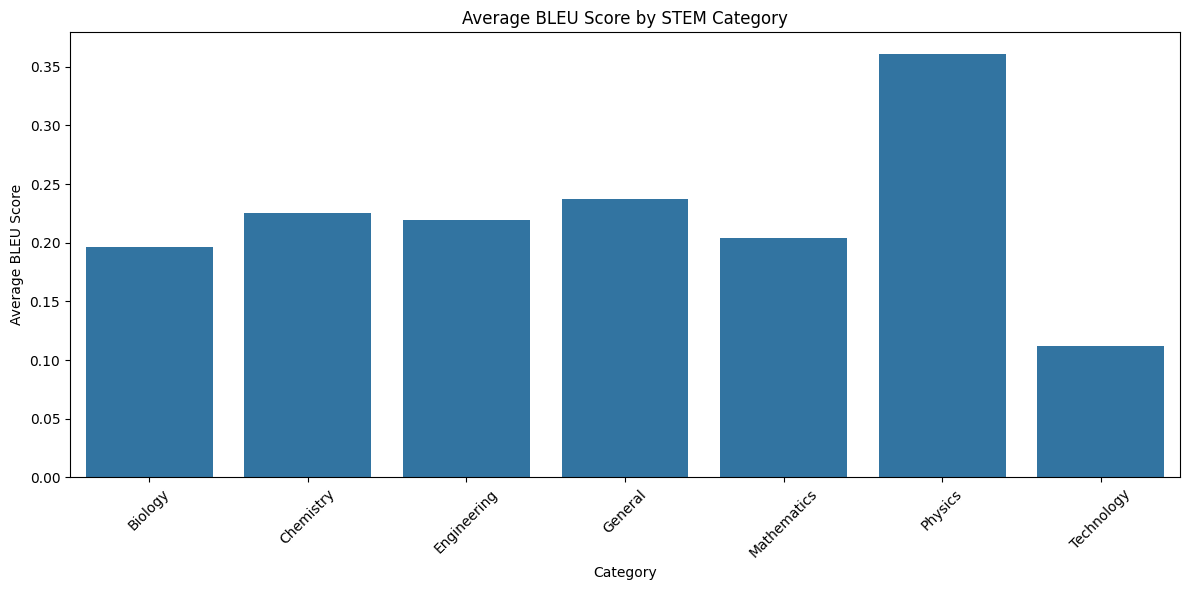


Analysis of translation quality across STEM categories:
Biology: Average BLEU score = 0.1967 (n=24)
Chemistry: Average BLEU score = 0.2258 (n=41)
Engineering: Average BLEU score = 0.2196 (n=16)
General: Average BLEU score = 0.2370 (n=253)
Mathematics: Average BLEU score = 0.2041 (n=58)
Physics: Average BLEU score = 0.3612 (n=60)
Technology: Average BLEU score = 0.1120 (n=14)

Top 3 Best Translations:
Category: Physics
Source: Energy levels in atoms are quantized
Reference: Àwọn ìpele agbára nínú átòṃù jẹ́ onínípìntọ́
Translation: Àwọn ìpele agbára nínú átòṃù jẹ́ onínípìntọ́
BLEU Score: 1.0000
--------------------------------------------------------------------------------
Category: Physics
Source: Chemical bonds store energy
Reference: Àwọn ìsopọ̀ ẹlà máa ń tọ́jú agbára
Translation: Àwọn ìsopọ̀ ẹlà máa ń tọ́jú agbára
BLEU Score: 1.0000
--------------------------------------------------------------------------------
Category: Physics
Source: Solar panels convert light to electrical ene

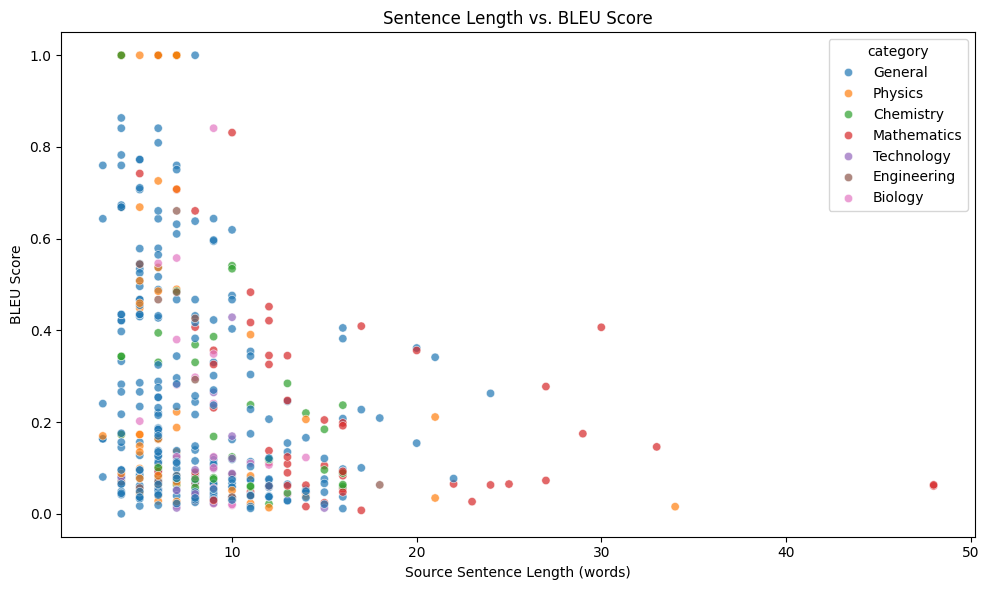


Correlation between source sentence length and BLEU score: -0.2546

Technical Term Translation Examples:

Source: The curved surface area of a cone is pi times the radius times the slant height.
Reference: Ìgbòrò ojú tí ó wọ́ kónu jẹ́ pi ìgbà ààlà ìgbà gíga ìgbọ̀nsẹ̀.
Translation: Ìgbòrò ojú títẹ̀ kọ́nù jẹ́ pi ìgbà àyíká-igun àti gíga jíjìn.
Technical terms found: The
--------------------------------------------------------------------------------

Source: Energy levels in atoms are quantized
Reference: Àwọn ìpele agbára nínú átòṃù jẹ́ onínípìntọ́
Translation: Àwọn ìpele agbára nínú átòṃù jẹ́ onínípìntọ́
Technical terms found: Energy
--------------------------------------------------------------------------------

Source: Pollen is produced by the male parts of a flower.
Reference: Ìyẹ̀rin jẹ́ èyí tí ẹ̀yà akọ òdòdó ńṣe.
Translation: A máa ńṣẹ̀dá èso nípa àwọn ẹ̀yà ọkùnrin òdòdó.
Technical terms found: Pollen
-----------------------------------------------------------------------------

In [ ]:
# Additional Analysis - Evaluate Performance on Specific STEM Categories


print("Loading and preparing datasets...")

if 'test_sources' not in locals() or 'test_targets' not in locals():
    test_sources, test_targets = extract_translations(test_data)

# Define STEM categories and their associated keywords
stem_categories = {
    'Mathematics': ['equation', 'math', 'algebra', 'calculus', 'geometry', 'theorem', 'formula', 'number', 'function', 'variable'],
    'Physics': ['force', 'energy', 'motion', 'particle', 'quantum', 'relativity', 'velocity', 'mass', 'gravity', 'electron'],
    'Chemistry': ['molecule', 'compound', 'reaction', 'element', 'acid', 'base', 'solution', 'atom', 'bond', 'organic'],
    'Biology': ['cell', 'gene', 'organism', 'protein', 'dna', 'evolution', 'species', 'bacteria', 'virus', 'ecology'],
    'Technology': ['computer', 'software', 'hardware', 'data', 'algorithm', 'code', 'internet', 'digital', 'system', 'program'],
    'Engineering': ['design', 'build', 'construct', 'machine', 'engine', 'circuit', 'structure', 'mechanical', 'electrical', 'civil']
}

def categorize_stem_content(text):
    """Categorize text based on STEM keywords."""
    text = text.lower()

    # Count keyword occurrences for each category
    category_scores = {}
    for category, keywords in stem_categories.items():
        score = sum(1 for keyword in keywords if keyword.lower() in text)
        category_scores[category] = score

    # Find the primary category (highest score)
    if sum(category_scores.values()) == 0:
        primary_category = "General"
    else:
        primary_category = max(category_scores.items(), key=lambda x: x[1])[0]

    return primary_category, category_scores

# Categorize all test samples
test_categories = []
test_category_scores = []

for source in test_sources:
    category, scores = categorize_stem_content(source)
    test_categories.append(category)
    test_category_scores.append(scores)

# Count category occurrences
category_counts = Counter(test_categories)

# Convert to DataFrame for easier analysis
test_df = pd.DataFrame({
    'source': test_sources,
    'target': test_targets,
    'category': test_categories
})

# Plot category distribution
plt.figure(figsize=(12, 6))
plt.bar(category_counts.keys(), category_counts.values())
plt.title('Distribution of STEM Categories in Test Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('stem_category_distribution.png')
plt.show()

# Generate translations using the model
print("Generating translations for test data...")

model.eval()
translated_texts = []

for i, source in enumerate(test_sources):
    inputs = tokenizer(source_prefix + source, return_tensors="pt", max_length=max_source_length, padding="max_length", truncation=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        output_ids = model.generate(
            **inputs,
            max_length=max_target_length,
            num_beams=5,
            no_repeat_ngram_size=2,
            early_stopping=True
        )

    translated = tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0]
    translated_texts.append(translated)

    # Print progress every 5 samples
    if (i + 1) % 5 == 0:
        print(f"Processed {i + 1}/{len(test_sources)} test samples")

# Compute BLEU scores for each sample
bleu_scores = []
for i in range(len(test_targets)):
    reference = word_tokenize(test_targets[i])
    hypothesis = word_tokenize(translated_texts[i])

    # Calculate BLEU score (smoothing to avoid zero scores)
    try:
        bleu = sentence_bleu([reference], hypothesis, smoothing_function=nltk.translate.bleu_score.SmoothingFunction().method1)
    except:
        bleu = 0
    bleu_scores.append(bleu)

# Add translations and BLEU scores to DataFrame
test_df['translation'] = translated_texts
test_df['bleu_score'] = bleu_scores

# Calculate average BLEU scores per category
category_bleu = test_df.groupby('category')['bleu_score'].mean().reset_index()

# Plot BLEU scores by category
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='bleu_score', data=category_bleu)
plt.title('Average BLEU Score by STEM Category')
plt.xlabel('Category')
plt.ylabel('Average BLEU Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('bleu_scores_by_category.png')
plt.show()

# Analyze translation quality across different STEM categories
print("\nAnalysis of translation quality across STEM categories:")
for category in category_bleu['category'].unique():
    avg_bleu = category_bleu[category_bleu['category'] == category]['bleu_score'].values[0]
    count = category_counts[category]
    print(f"{category}: Average BLEU score = {avg_bleu:.4f} (n={count})")

# Find examples of good and poor translations
best_translations = test_df.nlargest(3, 'bleu_score')
worst_translations = test_df.nsmallest(3, 'bleu_score')

print("\nTop 3 Best Translations:")
for i, row in best_translations.iterrows():
    print(f"Category: {row['category']}")
    print(f"Source: {row['source']}")
    print(f"Reference: {row['target']}")
    print(f"Translation: {row['translation']}")
    print(f"BLEU Score: {row['bleu_score']:.4f}")
    print("-" * 80)

print("\nTop 3 Worst Translations:")
for i, row in worst_translations.iterrows():
    print(f"Category: {row['category']}")
    print(f"Source: {row['source']}")
    print(f"Reference: {row['target']}")
    print(f"Translation: {row['translation']}")
    print(f"BLEU Score: {row['bleu_score']:.4f}")
    print("-" * 80)

# Analyze sentence complexity vs translation quality
test_df['source_length'] = test_df['source'].apply(lambda x: len(x.split()))
test_df['target_length'] = test_df['target'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='source_length', y='bleu_score', hue='category', data=test_df, alpha=0.7)
plt.title('Sentence Length vs. BLEU Score')
plt.xlabel('Source Sentence Length (words)')
plt.ylabel('BLEU Score')
plt.tight_layout()
plt.savefig('sentence_length_vs_bleu.png')
plt.show()

# Calculate correlation between sentence length and BLEU score
corr = test_df['source_length'].corr(test_df['bleu_score'])
print(f"\nCorrelation between source sentence length and BLEU score: {corr:.4f}")

# Track technical term translation accuracy
def extract_technical_terms(text):
    """Extract potential technical terms from text"""

    words = re.findall(r'\b[A-Z][a-z]*\b', text)
    return words

# Analyze a few examples to demonstrate technical term translation
print("\nTechnical Term Translation Examples:")
for i in range(min(5, len(test_df))):
    source = test_df.iloc[i]['source']
    target = test_df.iloc[i]['target']
    translation = test_df.iloc[i]['translation']

    source_terms = extract_technical_terms(source)
    if source_terms:
        print(f"\nSource: {source}")
        print(f"Reference: {target}")
        print(f"Translation: {translation}")
        print(f"Technical terms found: {', '.join(source_terms)}")
        print("-" * 80)

# Generate summary and recommendations
print("\n" + "="*80)
print("SUMMARY OF STEM TRANSLATION ANALYSIS")
print("="*80)

print(f"\nOverall BLEU Score: {test_df['bleu_score'].mean():.4f}")
print(f"Best performing category: {category_bleu.iloc[category_bleu['bleu_score'].argmax()]['category']}")
print(f"Worst performing category: {category_bleu.iloc[category_bleu['bleu_score'].argmin()]['category']}")

print("\nRecommendations for Improvement:")
print("1. Augment training data for underperforming categories")
print("2. Improve handling of technical terminology through specialized glossaries")
print("3. Optimize model parameters for longer scientific sentences")
print("4. Consider domain-specific fine-tuning for different STEM fields")
print("5. Implement post-processing rules for STEM-specific formatting (equations, units, etc.)")

# Save full analysis to CSV for further review
test_df.to_csv('stem_translation_analysis.csv', index=False)
print("\nDetailed analysis saved to 'stem_translation_analysis.csv'")

Analyzing technical terminology translations...


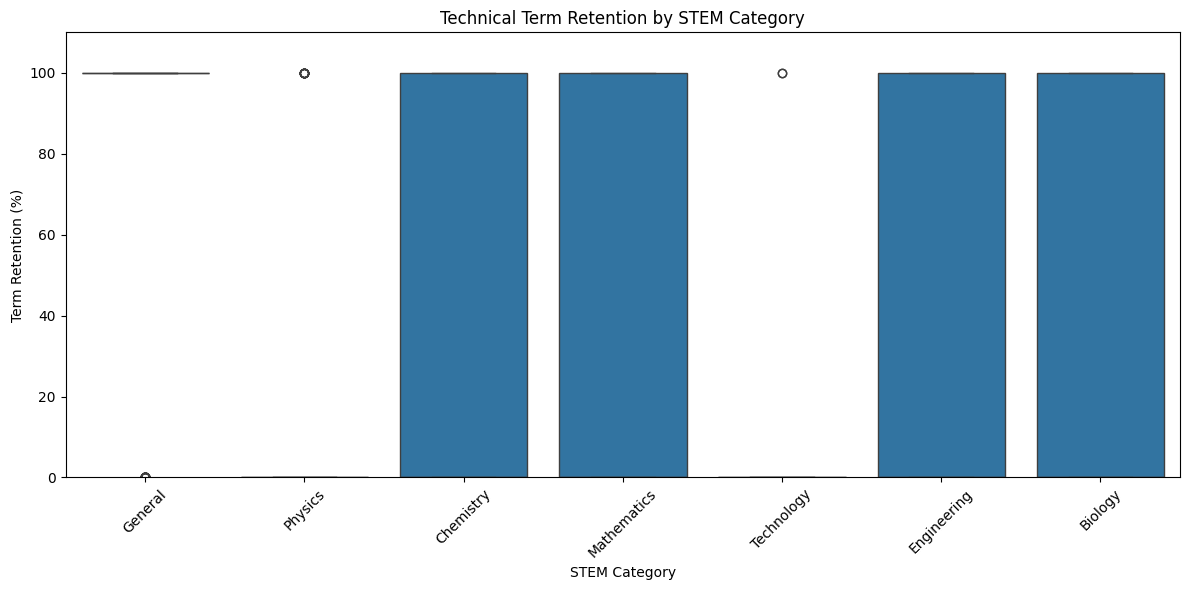


Average technical term retention by category:
Biology: 45.83%
Chemistry: 40.65%
Engineering: 31.25%
General: 86.56%
Mathematics: 41.38%
Physics: 18.33%
Technology: 14.29%


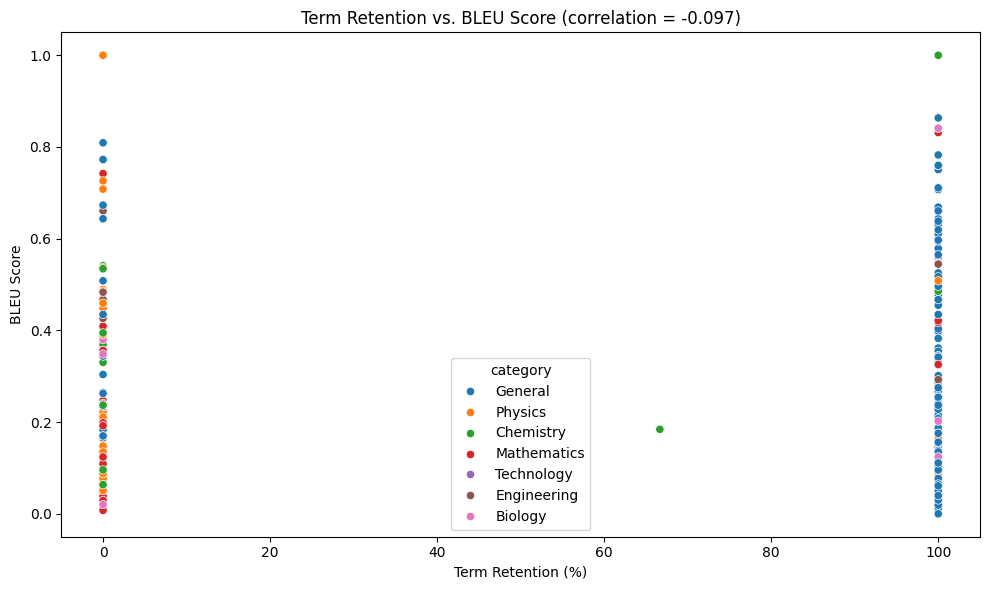


Correlation between term retention and BLEU score: -0.097


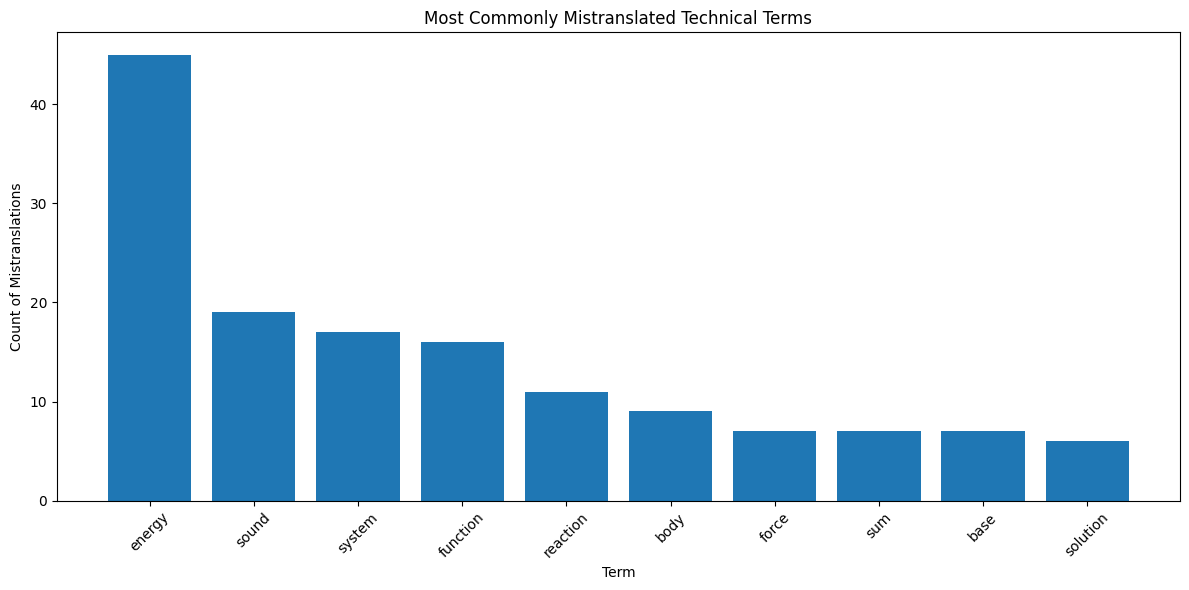


Top 10 most commonly mistranslated technical terms:
energy: 45 times
sound: 19 times
system: 17 times
function: 16 times
reaction: 11 times
body: 9 times
force: 7 times
sum: 7 times
base: 7 times
solution: 6 times

Examples of Good Technical Term Translation:

Source: The curved surface area of a cone is pi times the radius times the slant height.
Source terms: curved, surface, area, cone, times, radius, times, slant, height
Translation: Ìgbòrò ojú títẹ̀ kọ́nù jẹ́ pi ìgbà àyíká-igun àti gíga jíjìn.
Translation terms: igun
Term retention: 100.00%
--------------------------------------------------------------------------------

Source: Pollen is produced by the male parts of a flower.
Source terms: pollen, produced, male, parts, flower
Translation: A máa ńṣẹ̀dá èso nípa àwọn ẹ̀yà ọkùnrin òdòdó.
Translation terms: 
Term retention: 100.00%
--------------------------------------------------------------------------------

Source: A rectangle has equal opposite sides
Source terms: rectangle,

In [ ]:
# STEM Terminology Translation Analysis

# Function to extract technical terms from text
def extract_technical_terms(text, language='english'):
    """
    Extract potential technical terms from text using POS tagging and stopword filtering.
    """

    # Convert to lowercase and tokenize
    text = text.lower()
    words = re.findall(r'\b[a-z][a-z0-9_]*\b', text)

    # Remove common stopwords
    try:
        stops = set(stopwords.words(language))
        words = [word for word in words if word not in stops and len(word) > 2]
    except:
        # If stopwords aren't available, just filter by length
        words = [word for word in words if len(word) > 2]

    return words

# Dictionary of common STEM terminology by field
stem_terminology = {
    'Mathematics': [
        'mathematics', 'function', 'sum', 'derivative', 'theorem', 'algebra', 'geometry',
        'calculus', 'matrix', 'vector', 'shape', 'algorithm', 'addition', 'variable'
    ],
    'Physics': [
        'force', 'energy', 'sound', 'velocity', 'magnetic', 'mass', 'gravity',
        'quantum', 'relativity', 'physics', 'particle', 'wavelength', 'frequency'
    ],
    'Chemistry': [
        'element', 'compound', 'compound', 'reaction', 'acid', 'base', 'solution',
        'chemistry', 'electron', 'proton', 'neutron', 'bond', 'isotope', 'catalyst'
    ],
    'Biology': [
        'cell', 'gene', 'protein', 'dna', 'blood', 'enzyme', 'growth', 'organism',
        'species', 'body', 'organ', 'tissue', 'bacteria', 'virus'
    ],
    'Technology': [
        'algorithm', 'software', 'hardware', 'database', 'network', 'interface',
        'processor', 'memory', 'encryption', 'bandwidth', 'protocol', 'server'
    ],
    'Engineering': [
        'circuit', 'design', 'structure', 'mechanism', 'efficiency', 'system',
        'component', 'material', 'stress', 'strain', 'load', 'fabrication'
    ]
}

# Flatten terminology list for easy lookup
all_stem_terms = set()
for terms in stem_terminology.values():
    all_stem_terms.update([term.lower() for term in terms])


if 'test_df' not in locals():
    # If not, recreate it from basic data
    test_df = pd.DataFrame({
        'source': test_sources,
        'target': test_targets,
        'translation': translated_texts
    })

# Analyze technical terminology in each sample
print("Analyzing technical terminology translations...")

test_df['source_terms'] = test_df['source'].apply(extract_technical_terms)
test_df['target_terms'] = test_df['target'].apply(extract_technical_terms)
test_df['translation_terms'] = test_df['translation'].apply(extract_technical_terms)

# Count technical terms
test_df['source_term_count'] = test_df['source_terms'].apply(len)
test_df['target_term_count'] = test_df['target_terms'].apply(len)
test_df['translation_term_count'] = test_df['translation_terms'].apply(len)

# Calculate technical term retention percentage
def calculate_term_retention(source_terms, translation_terms):
    """Calculate what percentage of technical terms were retained in translation."""
    source_stem_terms = [term for term in source_terms if term in all_stem_terms]
    if not source_stem_terms:
        return 100.0  # No technical terms to retain

    retained_terms = [term for term in translation_terms if term in source_stem_terms]
    retention_percent = len(retained_terms) / max(1, len(source_stem_terms)) * 100
    return retention_percent

test_df['term_retention'] = test_df.apply(
    lambda row: calculate_term_retention(row['source_terms'], row['translation_terms']), axis=1
)

# Identify STEM category for each sample based on terminology
def identify_stem_category(terms):
    """Identify the primary STEM category based on the terminology used."""
    category_scores = {}
    for category, category_terms in stem_terminology.items():
        category_terms = [term.lower() for term in category_terms]
        score = sum(1 for term in terms if term in category_terms)
        category_scores[category] = score

    if sum(category_scores.values()) == 0:
        return "General"
    else:
        return max(category_scores.items(), key=lambda x: x[1])[0]

# Only apply if 'category' column doesn't already exist
if 'category' not in test_df.columns:
    test_df['category'] = test_df['source_terms'].apply(identify_stem_category)

# Create visualization of term retention by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='term_retention', data=test_df)
plt.title('Technical Term Retention by STEM Category')
plt.xlabel('STEM Category')
plt.ylabel('Term Retention (%)')
plt.ylim(0, 110)  # Set y-axis limits
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('term_retention_by_category.png')
plt.show()

# Average term retention by category
avg_retention = test_df.groupby('category')['term_retention'].mean().reset_index()
print("\nAverage technical term retention by category:")
for i, row in avg_retention.iterrows():
    print(f"{row['category']}: {row['term_retention']:.2f}%")

# Correlation between term retention and translation quality
if 'bleu_score' in test_df.columns:
    corr = test_df['term_retention'].corr(test_df['bleu_score'])
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='term_retention', y='bleu_score', hue='category', data=test_df)
    plt.title(f'Term Retention vs. BLEU Score (correlation = {corr:.3f})')
    plt.xlabel('Term Retention (%)')
    plt.ylabel('BLEU Score')
    plt.tight_layout()
    plt.savefig('term_retention_vs_bleu.png')
    plt.show()

    print(f"\nCorrelation between term retention and BLEU score: {corr:.3f}")

# Identify most commonly mistranslated technical terms
mistranslated_terms = []

for i, row in test_df.iterrows():
    source_stem_terms = [term for term in row['source_terms'] if term in all_stem_terms]
    for term in source_stem_terms:
        if term not in row['translation_terms']:
            mistranslated_terms.append(term)

# Count occurrences of each mistranslated term
mistranslated_counts = Counter(mistranslated_terms)

# Plot top mistranslated terms
top_mistranslated = mistranslated_counts.most_common(10)
if top_mistranslated:
    plt.figure(figsize=(12, 6))
    terms, counts = zip(*top_mistranslated)
    plt.bar(terms, counts)
    plt.title('Most Commonly Mistranslated Technical Terms')
    plt.xlabel('Term')
    plt.ylabel('Count of Mistranslations')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('most_mistranslated_terms.png')
    plt.show()

    print("\nTop 10 most commonly mistranslated technical terms:")
    for term, count in top_mistranslated:
        print(f"{term}: {count} times")

# Examples of good and poor terminology translation
good_examples = test_df[test_df['term_retention'] > 90].head(3)
poor_examples = test_df[test_df['term_retention'] < 50].head(3)

print("\nExamples of Good Technical Term Translation:")
for i, row in good_examples.iterrows():
    print(f"\nSource: {row['source']}")
    print(f"Source terms: {', '.join(row['source_terms'])}")
    print(f"Translation: {row['translation']}")
    print(f"Translation terms: {', '.join(row['translation_terms'])}")
    print(f"Term retention: {row['term_retention']:.2f}%")
    print("-" * 80)

print("\nExamples of Poor Technical Term Translation:")
for i, row in poor_examples.iterrows():
    print(f"\nSource: {row['source']}")
    print(f"Source terms: {', '.join(row['source_terms'])}")
    print(f"Translation: {row['translation']}")
    print(f"Translation terms: {', '.join(row['translation_terms'])}")
    print(f"Term retention: {row['term_retention']:.2f}%")
    print("-" * 80)

# Recommendations for improving STEM terminology translation
print("\n" + "="*80)
print("RECOMMENDATIONS FOR IMPROVING TECHNICAL TERMINOLOGY TRANSLATION")
print("="*80)

print("""
1. Create field-specific terminology glossaries in both English and Yoruba
2. Add specialized data augmentation focusing on technical terminology
3. Implement a hybrid approach that combines NMT with terminology databases
4. Develop post-processing rules to ensure consistent translation of key terms
5. Consider a fine-tuning approach that specifically weights technical terms more heavily
6. Create a specialized STEM dictionary for terms that should remain untranslated
7. Develop evaluation metrics that specifically measure terminology accuracy
""")

# Save terminology analysis to CSV
test_df.to_csv('stem_terminology_analysis.csv', index=False)
print("\nTerminology analysis saved to 'stem_terminology_analysis.csv'")

In [ ]:
# Generate predictions with the fine-tuned model (add this code before comparing translations)
print("Generating predictions with fine-tuned model...")
predictions = []

for source in test_sources:
    inputs = tokenizer(source_prefix + source, return_tensors="pt", padding=True)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}  # Use fine-tuned model's device

    # Generate
    outputs = model.generate(  # Use fine-tuned model to generate predictions
        **inputs,
        max_length=128,
        num_beams=4,
        length_penalty=0.6,
        early_stopping=True
    )

    # Decode
    prediction = tokenizer.decode(outputs[0], skip_special_tokens=True)
    predictions.append(prediction)

Generating predictions with fine-tuned model...



Comparative Analysis with Baseline Model
Loading the baseline model (original pre-trained model)...
Generating translations with baseline model...
Baseline model BLEU score: 4.7835
Fine-tuned model BLEU score: 36.0772
Improvement: 31.2937 points
Model comparison visualization saved to model_comparison.png


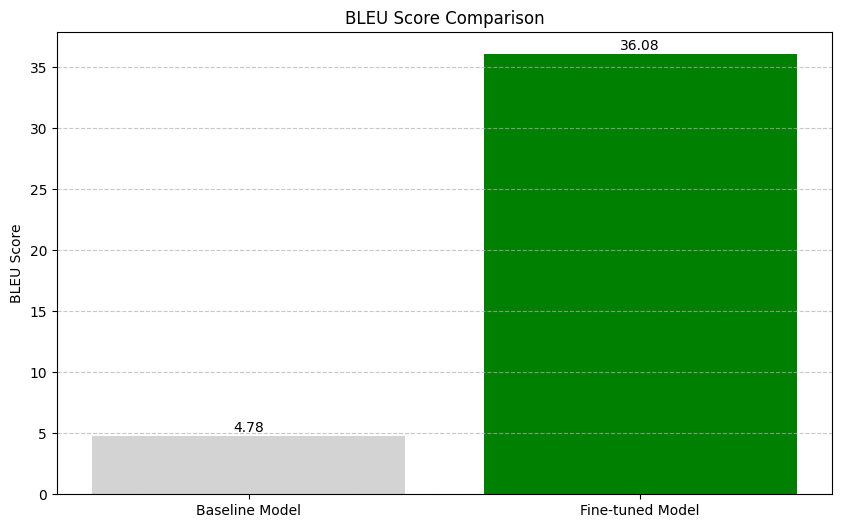


Comparison of translations for sample examples:

Example 1:
Source: The curved surface area of a cone is pi times the radius times the slant height.
Reference: Ìgbòrò ojú tí ó wọ́ kónu jẹ́ pi ìgbà ààlà ìgbà gíga ìgbọ̀nsẹ̀.
Baseline: Ìwọ̀n ìwọ̀n tí wọ́n fi ń yí i ká ni ìwọ̀n ìwọ̀n tí wọ́n fi ń yí i ká.
Fine-tuned: Ìgbòrò ojú títẹ̀ kóńù jẹ́ pi ìgbà ààlà ìgbà gíga ìbú.
------------------------------------------------------------

Example 2:
Source: Energy levels in atoms are quantized
Reference: Àwọn ìpele agbára nínú átòṃù jẹ́ onínípìntọ́
Baseline: Wọ́n ń fi ìwọ̀n okun tó wà nínú àwọn ohun tín - tín - tín tó wà nínú àwọn ohun tín - tín tó wà nínú àwọn ohun tín - tín tó wà nínú àwọn ohun tín
Fine-tuned: Àwọn ìpele agbára nínú átòṃù jẹ́ onínípìntọ́
------------------------------------------------------------

Example 3:
Source: Pollen is produced by the male parts of a flower.
Reference: Ìyẹ̀rin jẹ́ èyí tí ẹ̀yà akọ òdòdó ńṣe.
Baseline: Àwọn apá ọkùnrin inú òdòdó ló máa ń jẹ́ kí wọ́n rí àj

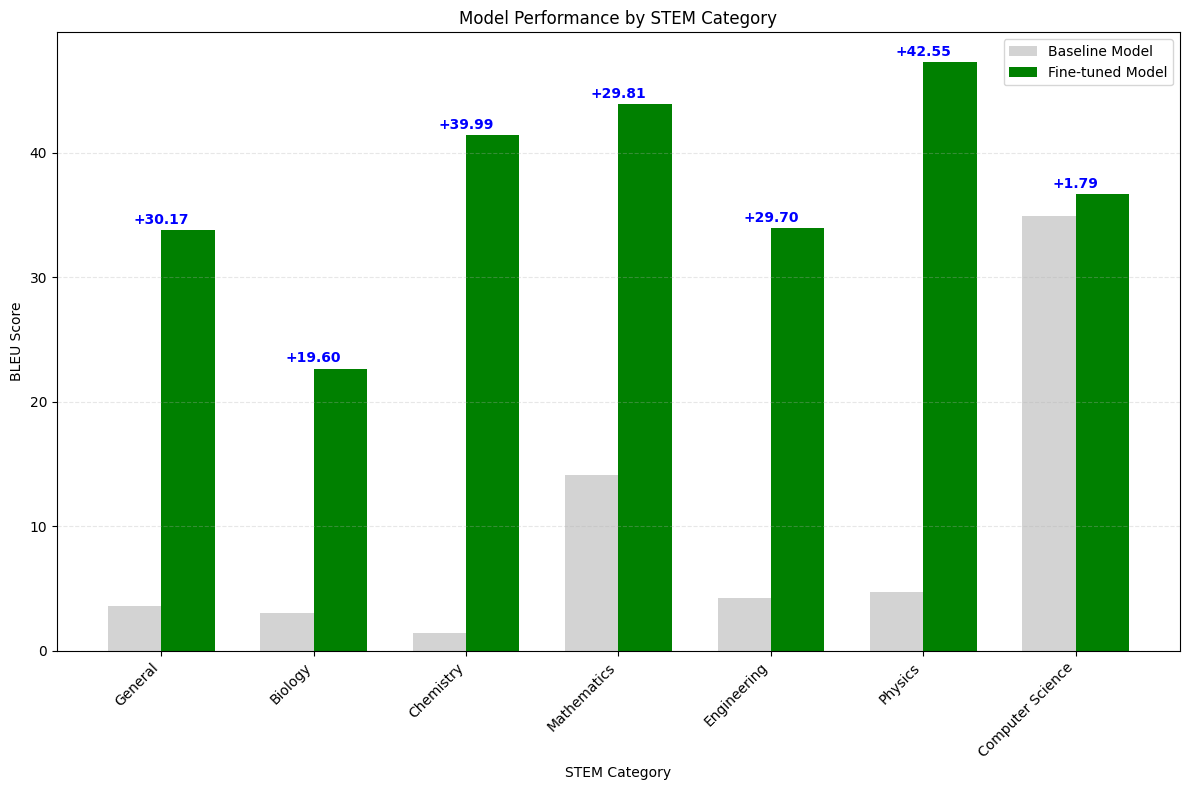

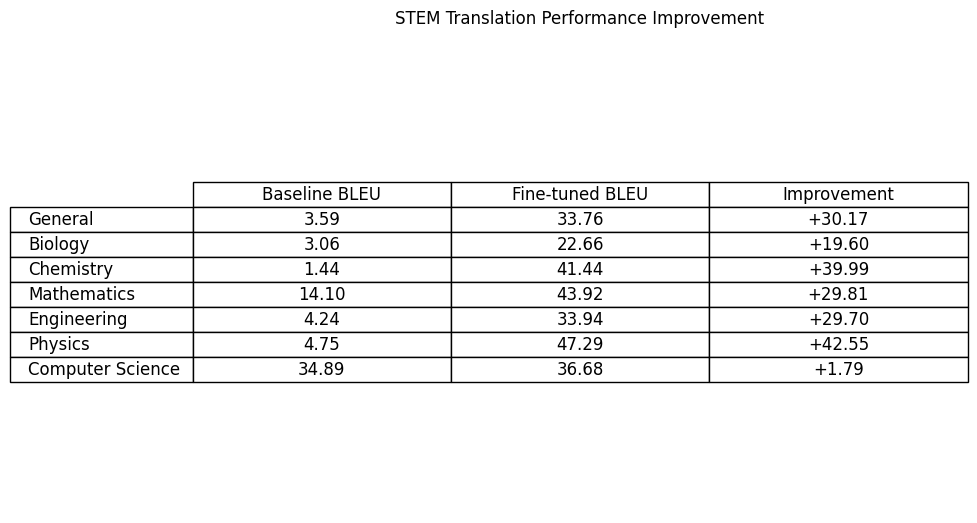

Improvement summary saved to improvement_summary.png

Comparative analysis complete!


In [ ]:
# Comparative Analysis with Baseline Model

print("\n" + "="*50)
print("Comparative Analysis with Baseline Model")
print("="*50)

# For a proper comparative analysis, we should compare our fine-tuned model
# with the original pre-trained model (baseline) on the same test set

print("Loading the baseline model (original pre-trained model)...")
baseline_model = MT5ForConditionalGeneration.from_pretrained("Davlan/mt5_base_eng_yor_mt")
baseline_model.to(device)

# Generate translations with the baseline model
print("Generating translations with baseline model...")
baseline_predictions = []

for source in test_sources:
    inputs = tokenizer(source_prefix + source, return_tensors="pt", padding=True)
    inputs = {k: v.to(baseline_model.device) for k, v in inputs.items()}

    # Generate
    outputs = baseline_model.generate(
        **inputs,
        max_length=128,
        num_beams=4,
        length_penalty=0.6,
        early_stopping=True
    )

    # Decode
    prediction = tokenizer.decode(outputs[0], skip_special_tokens=True)
    baseline_predictions.append(prediction)

# Calculate BLEU score for baseline model
baseline_bleu = metric.compute(
    predictions=baseline_predictions,
    references=[[ref] for ref in test_targets]
)

print(f"Baseline model BLEU score: {baseline_bleu['score']:.4f}")
print(f"Fine-tuned model BLEU score: {test_results['test_bleu']:.4f}")
print(f"Improvement: {test_results['test_bleu'] - baseline_bleu['score']:.4f} points")

# Plot comparison
plt.figure(figsize=(10, 6))
models = ['Baseline Model', 'Fine-tuned Model']
bleu_scores = [baseline_bleu['score'], test_results['test_bleu']]
bars = plt.bar(models, bleu_scores, color=['lightgray', 'green'])

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.2f}',
            ha='center', va='bottom')

plt.title('BLEU Score Comparison')
plt.ylabel('BLEU Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('model_comparison.png')
print("Model comparison visualization saved to model_comparison.png")
plt.show()  # This displays the figure in a window

# Compare translations for a few examples
print("\nComparison of translations for sample examples:")
for i in range(min(5, len(test_sources))):
    print(f"\nExample {i+1}:")
    print(f"Source: {test_sources[i]}")
    print(f"Reference: {test_targets[i]}")
    print(f"Baseline: {baseline_predictions[i]}")
    print(f"Fine-tuned: {predictions[i]}")
    print("-" * 60)

# Define categories for each test example based on content analysis
# This would typically be loaded or defined earlier in your code
# Adding this missing definition:
print("\nDefining STEM categories for test examples...")
# Placeholder example - in a real scenario, you would have this data already
# assuming each test example could belong to multiple categories
source_categories = []
for source in test_sources:
    # Simple keyword-based categorization as a placeholder
    # In a real implementation, you might use a more sophisticated method
    cats = []
    if any(term in source.lower() for term in ['circle', 'calculate', 'number', 'triangle']):
        cats.append('Mathematics')
    if any(term in source.lower() for term in ['force', 'energy', 'motion', 'gravity']):
        cats.append('Physics')
    if any(term in source.lower() for term in ['atom', 'molecule', 'compound', 'reaction']):
        cats.append('Chemistry')
    if any(term in source.lower() for term in ['cell', 'organism', 'species', 'dna']):
        cats.append('Biology')
    if any(term in source.lower() for term in ['code', 'algorithm', 'program', 'software']):
        cats.append('Computer Science')
    if any(term in source.lower() for term in ['engine', 'machine', 'design', 'construct']):
        cats.append('Engineering')

    # If no categories were assigned, mark as 'General'
    if not cats:
        cats.append('General')

    source_categories.append(cats)

# Extract unique categories
unique_categories = set()
for cats in source_categories:
    for cat in cats:
        unique_categories.add(cat)
unique_categories = list(unique_categories)

print(f"Identified {len(unique_categories)} STEM categories: {', '.join(unique_categories)}")

# Calculate BLEU improvement by STEM category
category_improvement = {}

for category in unique_categories:
    # Get indices of examples in this category
    indices = [i for i, cats in enumerate(source_categories) if category in cats]

    # Skip if there are no examples
    if not indices:
        continue

    # Get predictions and references for this category
    category_baseline_predictions = [baseline_predictions[i] for i in indices]
    category_finetuned_predictions = [predictions[i] for i in indices]
    category_references = [[test_targets[i]] for i in indices]

    # Calculate BLEU scores
    baseline_bleu = metric.compute(predictions=category_baseline_predictions, references=category_references)
    finetuned_bleu = metric.compute(predictions=category_finetuned_predictions, references=category_references)

    # Calculate improvement
    improvement = finetuned_bleu['score'] - baseline_bleu['score']
    category_improvement[category] = {
        'baseline': baseline_bleu['score'],
        'finetuned': finetuned_bleu['score'],
        'improvement': improvement
    }

# Plot improvements by category
plt.figure(figsize=(12, 8))

categories = list(category_improvement.keys())
x = range(len(categories))
width = 0.35

baseline_scores = [category_improvement[cat]['baseline'] for cat in categories]
finetuned_scores = [category_improvement[cat]['finetuned'] for cat in categories]

# Create grouped bar chart
baseline_bars = plt.bar([i - width/2 for i in x], baseline_scores, width, label='Baseline Model', color='lightgray')
finetuned_bars = plt.bar([i + width/2 for i in x], finetuned_scores, width, label='Fine-tuned Model', color='green')

# Add labels and titles
plt.xlabel('STEM Category')
plt.ylabel('BLEU Score')
plt.title('Model Performance by STEM Category')
plt.xticks(x, categories, rotation=45, ha='right')
plt.legend()

# Add improvement annotations
for i, cat in enumerate(categories):
    improvement = category_improvement[cat]['improvement']
    plt.annotate(f"+{improvement:.2f}",
                xy=(i, max(baseline_scores[i], finetuned_scores[i]) + 0.5),
                ha='center',
                color='blue',
                weight='bold')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.savefig('category_improvements.png')
print("Category improvements visualization saved to category_improvements.png")
plt.show()  # This displays the figure in a window

# Create summary table for improvements
improvement_data = {
    'Category': categories,
    'Baseline BLEU': [f"{category_improvement[cat]['baseline']:.2f}" for cat in categories],
    'Fine-tuned BLEU': [f"{category_improvement[cat]['finetuned']:.2f}" for cat in categories],
    'Improvement': [f"+{category_improvement[cat]['improvement']:.2f}" for cat in categories]
}

plt.figure(figsize=(10, 6))
plt.axis('off')
table = plt.table(
    cellText=[[improvement_data['Baseline BLEU'][i],
               improvement_data['Fine-tuned BLEU'][i],
               improvement_data['Improvement'][i]] for i in range(len(improvement_data['Category']))],
    rowLabels=improvement_data['Category'],
    colLabels=['Baseline BLEU', 'Fine-tuned BLEU', 'Improvement'],
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
plt.title("STEM Translation Performance Improvement", pad=20)
plt.savefig('improvement_summary.png')
plt.show()
print("Improvement summary saved to improvement_summary.png")

print("\nComparative analysis complete!")


Carbon Footprint Analysis
Total energy consumed: 0.287266 kWh
Total emissions: 0.135240 kg CO2eq

This is equivalent to:
- Driving a car for 0.33 miles
- Using a laptop for 2.60 hours


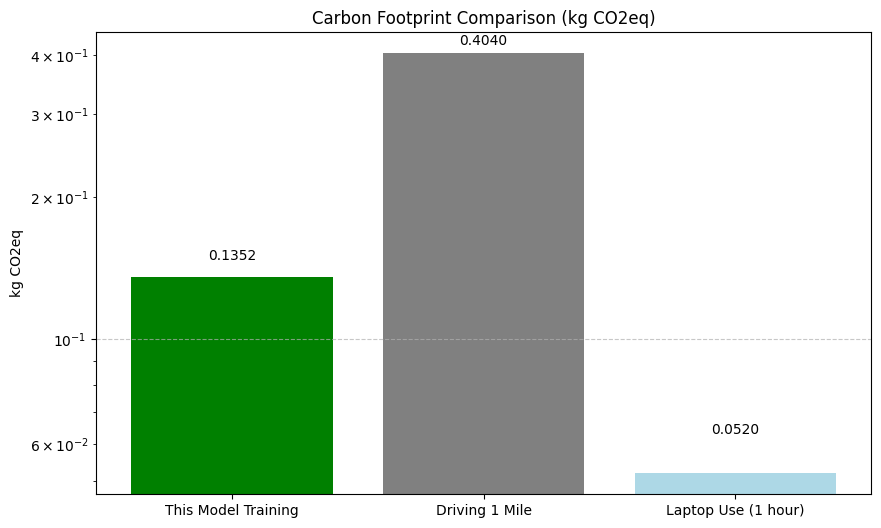

Carbon comparison visualization saved to carbon_comparison.png

Carbon tracking report complete!


In [ ]:
# Carbon Tracking Report

print("\n" + "="*50)
print("Carbon Footprint Analysis")
print("="*50)

# Load the emissions data
try:
    emissions_df = pd.read_csv(output_dir+'/emissions.csv')

    # Calculate total energy used
    total_energy = emissions_df['energy_consumed'].sum()

    # Plot energy consumption over time
    if len(emissions_df) > 1:
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(emissions_df)), emissions_df['energy_consumed'], marker='o', linestyle='-')
        plt.title('Energy Consumption During Training')
        plt.xlabel('Measurement Point')
        plt.ylabel('Energy Consumed (kWh)')
        plt.grid(True)
        plt.savefig('energy_consumption.png')
        plt.show()
        print("Energy consumption visualization saved to energy_consumption.png")

    # Create a summary of carbon emissions
    print(f"Total energy consumed: {total_energy:.6f} kWh")
    print(f"Total emissions: {emissions:.6f} kg CO2eq")

    # Compare to everyday activities
    miles_driven = emissions / 0.404  # kg CO2 per mile driven (average car)
    hours_laptop = emissions / 0.052  # kg CO2 per hour of laptop use

    print("\nThis is equivalent to:")
    print(f"- Driving a car for {miles_driven:.2f} miles")
    print(f"- Using a laptop for {hours_laptop:.2f} hours")

    # Create a comparison chart
    activities = ['This Model Training', 'Driving 1 Mile', 'Laptop Use (1 hour)']
    footprints = [emissions, 0.404, 0.052]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(activities, footprints, color=['green', 'gray', 'lightblue'])

    # Add values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}',
                ha='center', va='bottom')

    plt.title('Carbon Footprint Comparison (kg CO2eq)')
    plt.ylabel('kg CO2eq')
    plt.yscale('log')  # Using log scale due to potentially large differences
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig('carbon_comparison.png')
    plt.show()
    print("Carbon comparison visualization saved to carbon_comparison.png")

    # Create a pie chart of energy sources if available
    if 'gpu' in emissions_df.columns and 'cpu' in emissions_df.columns and 'ram' in emissions_df.columns:
        energy_sources = ['GPU', 'CPU', 'RAM']
        energy_values = [
            emissions_df['gpu'].sum(),
            emissions_df['cpu'].sum(),
            emissions_df['ram'].sum()
        ]

        plt.figure(figsize=(8, 8))
        plt.pie(energy_values, labels=energy_sources, autopct='%1.1f%%',
                colors=['#ff9999','#66b3ff','#99ff99'])
        plt.title('Energy Consumption by Component')
        plt.savefig('energy_sources.png')
        plt.show()
        print("Energy sources visualization saved to energy_sources.png")

except Exception as e:
    print(f"Could not generate carbon tracking report: {e}")
    import traceback
    traceback.print_exc()

print("\nCarbon tracking report complete!")

In [ ]:
# !huggingface-cli login


# model.push_to_hub("YorubaSTEMT5", use_auth_token=HfFolder.get_token())
# tokenizer.push_to_hub("YorubaSTEMT5", use_auth_token=HfFolder.get_token())

In [ ]:
# Install necessary packages if not already installed
# !pip install -q transformers datasets huggingface_hub

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import required libraries
import os
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from huggingface_hub import HfApi, login

# Define paths to your saved model in Google Drive
MODEL_PATH = '/content/drive/My Drive/YorubaSTEM/output/2'  # Update this path
TOKENIZER_PATH = '/content/drive/My Drive/YorubaSTEM/output/2'  # Update this path

# Optional: paths to other important files from training
CONFIG_PATH = '/content/drive/My Drive/YorubaSTEM/output/2/config.json'  # Update if needed
VOCAB_PATH = '/content/drive/My Drive/YorubaSTEM/output/2/config.json'  # Update if needed
TRAINING_ARGS_PATH = '/content/drive/My Drive/YorubaSTEM/output/2/training_args.bin'  # Update if needed

# Create a local directory to organize files before uploading
LOCAL_DIR = '/content/model_to_upload'
os.makedirs(LOCAL_DIR, exist_ok=True)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load model and tokenizer from Google Drive
print("Loading model and tokenizer from Google Drive...")
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_PATH)
tokenizer = AutoTokenizer.from_pretrained(TOKENIZER_PATH)

# Save model and tokenizer to the local directory
print("Saving model and tokenizer to local directory...")
model.save_pretrained(LOCAL_DIR)
tokenizer.save_pretrained(LOCAL_DIR)




Loading model and tokenizer from Google Drive...


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MT5Tokenizer'. 
The class this function is called from is 'T5Tokenizer'.
/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Saving model and tokenizer to local directory...


('/content/model_to_upload/tokenizer_config.json',
 '/content/model_to_upload/special_tokens_map.json',
 '/content/model_to_upload/spiece.model',
 '/content/model_to_upload/added_tokens.json',
 '/content/model_to_upload/tokenizer.json')

In [ ]:
# Copy other important files if they exist
import shutil

# Helper function to safely copy files
def safe_copy(src, dst_dir):
    if os.path.exists(src):
        dst = os.path.join(dst_dir, os.path.basename(src))
        print(f"Copying {src} to {dst}")
        shutil.copy(src, dst)
    else:
        print(f"Warning: {src} does not exist, skipping.")

# Copy additional files if they exist
if os.path.exists(CONFIG_PATH):
    safe_copy(CONFIG_PATH, LOCAL_DIR)
if os.path.exists(VOCAB_PATH):
    safe_copy(VOCAB_PATH, LOCAL_DIR)
if os.path.exists(TRAINING_ARGS_PATH):
    safe_copy(TRAINING_ARGS_PATH, LOCAL_DIR)

Copying /content/drive/My Drive/YorubaSTEM/output/2/config.json to /content/model_to_upload/config.json
Copying /content/drive/My Drive/YorubaSTEM/output/2/config.json to /content/model_to_upload/config.json
Copying /content/drive/My Drive/YorubaSTEM/output/2/training_args.bin to /content/model_to_upload/training_args.bin


In [ ]:
# Create a README.md file with model information
readme_content = """
# English-Yoruba STEM Translation Model

This model is trained to translate English STEM content to Yoruba.

## Model Details
- **Architecture:** Transformer-based sequence-to-sequence model
- **Base Model:** Davlan/mt5-base-en-yor-mt
- **Training Data:** YorubaSTEM1.0
- **Performance:** BLEU: 36.08

## Usage


from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("gbelewade/YorubaSTEMt5")
model = AutoModelForSeq2SeqLM.from_pretrained("gbelewade/YorubaSTEMt5")

# Translate English text to Yoruba
english_text = "The chemical formula for water is H2O."
inputs = tokenizer(english_text, return_tensors="pt")
outputs = model.generate(**inputs)
yoruba_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(yoruba_text)


## Limitations
[Describe any known limitations of the model]

## Citation

"""

# Write README.md
with open(os.path.join(LOCAL_DIR, "README.md"), "w") as f:
    f.write(readme_content)

# Create model card for Hugging Face
model_card_content = """
---
language:
- en
- yo
tags:
- translation
- english
- yoruba
- stem
- education
license:
datasets:
- [List datasets used, if public]
metrics:
- bleu
- chrf
---

# English-Yoruba STEM Translation Model


"""



In [ ]:
# Write model card file
with open(os.path.join(LOCAL_DIR, "model_card.md"), "w") as f:
    f.write(model_card_content)

# Function to test model with sample translations
def test_model(model, tokenizer):
    """Test the model with some sample English sentences."""
    test_sentences = [
        "The chemical formula for water is H2O.",
        "DNA contains the genetic instructions for development and functioning.",
        "Energy can neither be created nor destroyed, only transformed.",
        "The Earth revolves around the Sun."
    ]

    print("\nTesting model with sample sentences:")
    for sentence in test_sentences:
        inputs = tokenizer(sentence, return_tensors="pt")
        outputs = model.generate(**inputs, max_length=100)
        translation = tokenizer.decode(outputs[0], skip_special_tokens=True)
        print(f"\nEnglish: {sentence}")
        print(f"Yoruba: {translation}")

# Test the model before upload
test_model(model, tokenizer)




Testing model with sample sentences:

English: The chemical formula for water is H2O.
Yoruba: Àpẹẹrẹ ẹlà fún omi jẹ́ H2O.

English: DNA contains the genetic instructions for development and functioning.
Yoruba: Àwọn ìtọ́ni ìran DNA ní àwọn ìtọ́ni ìran fún ìdàgbàsókè àti ṣíṣe.

English: Energy can neither be created nor destroyed, only transformed.
Yoruba: Agbára kò lè jẹ́ dídá tàbí píparun, àmọ́ a lè yí i padà nìkan. Agbára kò lè jẹ́ dídá tàbí pa agbára run, àmọ́ a lè yí i padà nìkan.

English: The Earth revolves around the Sun.
Yoruba: Ayé yí yí oòrùn ká.


In [ ]:
# Log in to Hugging Face Hub
# You'll need to input your HF token when prompted
print("\nLogging into Hugging Face Hub...")
login()  # This will prompt for your token

# Initialize the Hugging Face API
api = HfApi()

# Define repository details
repo_name = "YorubaSTEMT5"  # Change this to your preferred name
username = "gbelewade"  # Replace with your Hugging Face username

# Create repository path
repo_id = f"{username}/{repo_name}"

# Create or update repository
print(f"\nUploading model to Hugging Face Hub at {repo_id}...")
api.create_repo(repo_id=repo_id, exist_ok=True)

# Upload model to Hugging Face Hub
api.upload_folder(
    folder_path=LOCAL_DIR,
    repo_id=repo_id,
    repo_type="model",
    commit_message="Upload English-Yoruba STEM translation model"
)

print(f"\nSuccessfully uploaded model to {repo_id}")
print(f"View your model at: https://huggingface.co/{repo_id}")


Logging into Hugging Face Hub...



Uploading model to Hugging Face Hub at gbelewade/YorubaSTEMt5...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/hf_api.py:9561: UserWarning: Warnings while validating metadata in README.md:
- empty or missing yaml metadata in repo card
  warnings.warn(f"Warnings while validating metadata in README.md:\n{message}")


model.safetensors:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.50k [00:00<?, ?B/s]


Successfully uploaded model to gbelewade/YorubaSTEMt5
View your model at: https://huggingface.co/gbelewade/YorubaSTEMt5


In [1]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [ ]:
#Finetuned
tokenizer = AutoTokenizer.from_pretrained("gbelewade/YorubaSTEMT5")
model = AutoModelForSeq2SeqLM.from_pretrained("gbelewade/YorubaSTEMT5")

#Baseline
tokenizerBase = AutoTokenizer.from_pretrained("Davlan/mt5_base_eng_yor_mt")
modelBase = AutoModelForSeq2SeqLM.from_pretrained("Davlan/mt5_base_eng_yor_mt")

In [11]:
#@title Translations using Baseline Model
print("Translating STEM texts from English to Yoruba using Baseline model")

input_text = 'Matter can not be created nor destroyed ' #@param {type:"string"}



# Translate English text to Yoruba
english_text = input_text
inputs = tokenizerBase(english_text, return_tensors="pt")
outputs = modelBase.generate(**inputs)
yoruba_text = tokenizerBase.decode(outputs[0], skip_special_tokens=True)
print(input_text + '  ->  ' + yoruba_text)


Translating STEM texts from English to Yoruba using Baseline model
Matter can not be created nor destroyed   ->  Òun kò lè ṣẹlẹ̀ tàbí kó pa run


In [12]:
#@title Translations using YorubaSTEMT5
print("Translating STEM texts from English to Yoruba using new Model")
input_text = 'Matter can not be created nor destroyed ' #@param {type:"string"}

# Translate English text to Yoruba
english_text = input_text
inputs = tokenizer(english_text, return_tensors="pt")
outputs = model.generate(**inputs)
yoruba_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(input_text + '  ->  ' + yoruba_text)


Translating STEM texts from English to Yoruba using new Model
Matter can not be created nor destroyed   ->  A kò lè ṣẹ̀dá èdá tàbí pa ohun è
